# Set up

In [0]:
!pip install fastcluster

In [0]:
#!pip install hdbscan

In [0]:
# Load basic library
import re
import numpy as np
import time
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats

# import require packages for plotting
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


# Load Keras
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Dense
from keras.metrics import categorical_crossentropy


#Load sklearn
from sklearn import preprocessing as pp
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# cluster
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import fastcluster
#import hdbscan
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FastICA 
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import MiniBatchDictionaryLearning #other
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

#imblearn library
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

In [0]:
link='https://raw.githubusercontent.com/aapatel09/handson-unsupervised-learning/master/datasets/lending_club_data/LoanStats3a.csv'
data=pd.read_csv(link)
print(data.shape)
data.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.



(42542, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
columnsToKeep = ['loan_amnt','funded_amnt','funded_amnt_inv','term', \
'int_rate','installment','grade','sub_grade', \
'emp_length','home_ownership','annual_inc', \
'verification_status','pymnt_plan','purpose', \
'addr_state','dti','delinq_2yrs','earliest_cr_line', \
'mths_since_last_delinq','mths_since_last_record', \
'open_acc','pub_rec','revol_bal','revol_util', \
'total_acc','initial_list_status','out_prncp', \
'out_prncp_inv','total_pymnt','total_pymnt_inv', \
'total_rec_prncp','total_rec_int','total_rec_late_fee',
\
'recoveries','collection_recovery_fee','last_pymnt_d', \
'last_pymnt_amnt']

In [0]:
data = data.loc[:,columnsToKeep]
print(data.shape)
data.head()

(42542, 37)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,Jan-85,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,Apr-99,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,Nov-01,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,Feb-96,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,Jan-96,38.0,NaN,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30


# Preprocessing

## Transform String Format to Numerical Format

In [0]:
data[['term','int_rate','emp_length','revol_util']]

,term,int_rate,emp_length,revol_util
0,36 months,10.65%,10+ years,83.70%
1,60 months,15.27%,< 1 year,9.40%
2,36 months,15.96%,10+ years,98.50%
3,36 months,13.49%,10+ years,21%
4,60 months,12.69%,1 year,53.90%
...,...,...,...,...
42537,36 months,7.75%,10+ years,NaN
42538,NaN,NaN,NaN,NaN
42539,NaN,NaN,NaN,NaN
42540,NaN,NaN,NaN,NaN


In [0]:
# Transform features from string to numeric
for i in ["term","int_rate","emp_length","revol_util"]:
  data.loc[:,i] = data.loc[:,i].apply(lambda x: re.sub("[^0-9]", "", str(x)))
  data.loc[:,i] = pd.to_numeric(data.loc[:,i])

In [0]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000.0,5000.0,4975.0,36.0,1065.0,162.87,B,B2,10.0,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,Jan-85,NaN,NaN,3.0,0.0,13648.0,8370.0,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62
1,2500.0,2500.0,2500.0,60.0,1527.0,59.83,C,C4,1.0,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,Apr-99,NaN,NaN,3.0,0.0,1687.0,940.0,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66
2,2400.0,2400.0,2400.0,36.0,1596.0,84.33,C,C5,10.0,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,Nov-01,NaN,NaN,2.0,0.0,2956.0,9850.0,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91
3,10000.0,10000.0,10000.0,36.0,1349.0,339.31,C,C1,10.0,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,Feb-96,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48
4,3000.0,3000.0,3000.0,60.0,1269.0,67.79,B,B5,1.0,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,Jan-96,38.0,NaN,15.0,0.0,27783.0,5390.0,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30


In [0]:
data.dtypes

loan_amnt                  float64
funded_amnt                float64
funded_amnt_inv            float64
term                       float64
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
pymnt_plan                  object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                float64
earliest_cr_line            object
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc                   float64
pub_rec                    float64
revol_bal                  float64
revol_util                 float64
total_acc                  float64
initial_list_status         object
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

In [0]:
# Display NaNs by feature object
objectFeats = [x for x in data.columns if data[x].dtype == 'object']
objectFeats
#nanCounter = np.isnan(data.loc[:,objectFeats]).sum()
#nanCounter

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d']

In [0]:
data.loc[:,objectFeats].head()

,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d
0,B,B2,RENT,Verified,n,credit_card,AZ,Jan-85,f,Jan-15
1,C,C4,RENT,Source Verified,n,car,GA,Apr-99,f,Apr-13
2,C,C5,RENT,Not Verified,n,small_business,IL,Nov-01,f,Jun-14
3,C,C1,RENT,Source Verified,n,other,CA,Feb-96,f,Jan-15
4,B,B5,RENT,Source Verified,n,other,OR,Jan-96,f,Jan-17


In [0]:
data.loc[:,objectFeats].isnull().sum()

grade                   7
sub_grade               7
home_ownership          7
verification_status     7
pymnt_plan              7
purpose                 7
addr_state              7
earliest_cr_line       36
initial_list_status     7
last_pymnt_d           90
dtype: int64

In [0]:
# Determine which features are numerical
numericalFeats = [x for x in data.columns if data[x].dtype != 'object']
#numericalFeats

In [0]:
data.loc[:,numericalFeats].head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000.0,5000.0,4975.0,36.0,1065.0,162.87,10.0,24000.0,27.65,0.0,NaN,NaN,3.0,0.0,13648.0,8370.0,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,171.62
1,2500.0,2500.0,2500.0,60.0,1527.0,59.83,1.0,30000.0,1.00,0.0,NaN,NaN,3.0,0.0,1687.0,940.0,4.0,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,119.66
2,2400.0,2400.0,2400.0,36.0,1596.0,84.33,10.0,12252.0,8.72,0.0,NaN,NaN,2.0,0.0,2956.0,9850.0,10.0,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,649.91
3,10000.0,10000.0,10000.0,36.0,1349.0,339.31,10.0,49200.0,20.00,0.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,357.48
4,3000.0,3000.0,3000.0,60.0,1269.0,67.79,1.0,80000.0,17.94,0.0,38.0,NaN,15.0,0.0,27783.0,5390.0,38.0,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,67.30


In [0]:
# Display NaNs by feature numerical
nanCounter = data.loc[:,numericalFeats].isnull().sum()
nanCounter

loan_amnt                      7
funded_amnt                    7
funded_amnt_inv                7
term                           7
int_rate                       7
installment                    7
emp_length                  1119
annual_inc                    11
dti                            7
delinq_2yrs                   36
mths_since_last_delinq     26933
mths_since_last_record     38891
open_acc                      36
pub_rec                       36
revol_bal                      7
revol_util                    97
total_acc                     36
out_prncp                      7
out_prncp_inv                  7
total_pymnt                    7
total_pymnt_inv                7
total_rec_prncp                7
total_rec_int                  7
total_rec_late_fee             7
recoveries                     7
collection_recovery_fee        7
last_pymnt_amnt                7
dtype: int64

## Process null data

In [0]:
from sklearn.impute import SimpleImputer
# Impute NaNs with mean 
fillWithMean = ['loan_amnt','funded_amnt','funded_amnt_inv','term', \
                'int_rate','installment','emp_length','annual_inc',\
                'dti','open_acc','revol_bal','revol_util','total_acc',\
                'out_prncp','out_prncp_inv','total_pymnt', \
                'total_pymnt_inv','total_rec_prncp','total_rec_int', \
                'last_pymnt_amnt']

# Impute NaNs with zero
fillWithZero = ['delinq_2yrs','mths_since_last_delinq', \
                'mths_since_last_record','pub_rec','total_rec_late_fee', \
                'recoveries','collection_recovery_fee']

# Perform imputation
im = SimpleImputer(strategy='mean')   
data.loc[:,fillWithMean] = im.fit_transform(data[fillWithMean])

data.loc[:,fillWithZero] = data.loc[:,fillWithZero].fillna(value=0,axis=1)

In [0]:
data.loc[:,numericalFeats].isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
emp_length                 0
annual_inc                 0
dti                        0
delinq_2yrs                0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

## Engineer Features

In [0]:
# Feature engineering
data['installmentOverLoanAmnt'] = data.installment/data.loan_amnt
data['loanAmntOverIncome'] = data.loan_amnt/data.annual_inc
data['revol_balOverIncome'] = data.revol_bal/data.annual_inc
data['totalPymntOverIncome'] = data.total_pymnt/data.annual_inc
data['totalPymntInvOverIncome'] = data.total_pymnt_inv/data.annual_inc
data['totalRecPrncpOverIncome'] = data.total_rec_prncp/data.annual_inc
data['totalRecIncOverIncome'] = data.total_rec_int/data.annual_inc

newFeats = ['installmentOverLoanAmnt','loanAmntOverIncome', \
            'revol_balOverIncome','totalPymntOverIncome', \
           'totalPymntInvOverIncome','totalRecPrncpOverIncome', \
            'totalRecIncOverIncome']

In [0]:
# Select features for training
numericalPlusNewFeats = numericalFeats+newFeats
X_train = data.loc[:,numericalPlusNewFeats]
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,installmentOverLoanAmnt,loanAmntOverIncome,revol_balOverIncome,totalPymntOverIncome,totalPymntInvOverIncome,totalRecPrncpOverIncome,totalRecIncOverIncome
0,5000.0,5000.0,4975.0,36.0,1065.0,162.87,10.0,24000.0,27.65,0.0,0.0,0.0,3.0,0.0,13648.0,8370.0,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,171.62,0.032574,0.208333,0.568667,0.244298,0.243077,0.208333,0.035965
1,2500.0,2500.0,2500.0,60.0,1527.0,59.83,1.0,30000.0,1.00,0.0,0.0,0.0,3.0,0.0,1687.0,940.0,4.0,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,119.66,0.023932,0.083333,0.056233,0.033818,0.033818,0.015215,0.014506
2,2400.0,2400.0,2400.0,36.0,1596.0,84.33,10.0,12252.0,8.72,0.0,0.0,0.0,2.0,0.0,2956.0,9850.0,10.0,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,649.91,0.035138,0.195886,0.241267,0.245321,0.245321,0.195886,0.049434
3,10000.0,10000.0,10000.0,36.0,1349.0,339.31,10.0,49200.0,20.00,0.0,35.0,0.0,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,357.48,0.033931,0.203252,0.113780,0.248616,0.248616,0.203252,0.045019
4,3000.0,3000.0,3000.0,60.0,1269.0,67.79,1.0,80000.0,17.94,0.0,38.0,0.0,15.0,0.0,27783.0,5390.0,38.0,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,67.30,0.022597,0.037500,0.347288,0.050836,0.050836,0.037500,0.013336


In [0]:
X_train.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
emp_length                 0
annual_inc                 0
dti                        0
delinq_2yrs                0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
installmentOverLoanAmnt    0
loanAmntOverIncome         0
revol_balOverIncome        0
totalPymntOverIncome       0
totalPymntInvOverIncome    0
totalRecPrncpOverIncome    0
totalRecIncOverIncome      0
dtype: int64

Select Final Set of Features and Perform Scaling

In [0]:
# Scale data
sX =StandardScaler()
X_train.loc[:,:] = sX.fit_transform(X_train)

Designate Labels for Evaluation

In [0]:
labels = data.grade
labels.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

In [0]:
data.grade.isnull().sum()

7

In [0]:
# Fill missing labels
labels = labels.fillna(value="Z")

# Convert labels to numerical values
lbl = pp.LabelEncoder()
lbl.fit(list(labels.values))
labels = pd.Series(data=lbl.transform(labels.values), name="grade")

# Store as y_train
y_train = labels
y_train

0        1
1        2
2        2
3        2
4        1
        ..
42537    0
42538    7
42539    7
42540    7
42541    7
Name: grade, Length: 42542, dtype: int64

In [0]:
y_train.value_counts()

1    12389
0    10183
2     8740
3     6016
4     3394
5     1301
6      512
7        7
Name: grade, dtype: int64

In [0]:
labels.isnull().sum()

0

In [0]:
labelsOriginalVSNew = pd.concat([labels, data.grade],axis=1)
labelsOriginalVSNew
#Nan --> fill =Z mean 7

,grade,grade
0,1,B
1,2,C
2,2,C
3,2,C
4,1,B
...,...,...
42537,0,A
42538,7,NaN
42539,7,NaN
42540,7,NaN


As you can see from Table 6-2, all the “A” grades have been transformed
into 0, the “B” grades into 1, etc.

In [0]:
# Compare loan grades with interest rates
interestAndGrade = pd.DataFrame(data=[data.int_rate,labels])
interestAndGrade = interestAndGrade.T
interestAndGrade.groupby("grade").mean()

,int_rate
grade,
0.0,734.270844
1.0,1101.420857
2.0,1349.988902
3.0,1557.714927
4.0,1737.676783
5.0,1926.530361
6.0,2045.125000
7.0,1216.501563


Higher letter grade loans have higher interest
rates.

# PCA

In [0]:
X_train.shape

(42542, 34)

In [0]:
n_components = 34
#whiten = False It is default False
random_state = 2018

pca = PCA(n_components=n_components,random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-1.380932,-1.474191,0.398311,2.831465,-0.056052,0.599083,-0.495896,1.032829,-0.358776,-0.338009,1.523137,-0.082681,-1.585536,-0.008231,1.243706,0.237386,0.059565,0.095048,0.028603,0.184175,-0.555917,0.187569,0.020415,0.018739,0.028970,-0.122407,-0.002309,-0.047735,-0.000752,-0.001790,0.001649,-2.114466e-06,-1.533894e-16,-2.996732e-16
1,-3.792047,-1.494778,0.935322,-1.820591,1.265852,-2.015702,-0.928890,1.521414,0.406402,-0.051833,-0.808692,-0.072513,0.931813,-0.579395,-0.934316,0.769138,0.031590,0.078209,0.234556,-0.484076,-0.189780,0.284942,-0.203410,-0.002010,-0.042531,0.072972,-0.174924,0.168269,0.003828,-0.040074,0.001319,-2.880617e-06,4.277832e-18,-2.269580e-17
2,-2.183863,-2.391327,0.633652,0.985710,0.113116,0.692513,-1.575598,0.567319,-0.492994,-0.465613,1.741415,0.039054,-1.223902,0.966469,-1.153819,-0.237713,0.323258,0.472916,0.082529,-0.121738,-0.059149,0.069538,0.171817,-0.008777,-0.061816,-0.046916,0.068757,-0.140824,-0.019357,0.017453,0.005126,-2.675065e-06,-3.990290e-17,-3.893261e-17
3,0.250494,0.022005,-0.281386,0.260463,-0.077475,0.261603,0.841456,-2.075136,0.085326,2.113879,1.207169,-0.425897,-0.772985,0.053153,0.274305,1.029250,0.306143,0.970693,0.173817,-0.391053,-0.020485,0.142582,0.171446,-0.029559,-0.037741,0.020004,0.003322,-0.020483,-0.003545,0.006880,0.002855,-7.874763e-07,-8.076494e-17,-1.055683e-16
4,-2.764185,1.640453,1.563633,1.193983,0.345615,-2.654270,0.152870,-0.548818,-0.688245,0.266337,-1.348406,-0.119117,1.095683,0.203939,0.220764,-0.437535,-0.419559,0.049982,0.180417,-0.386141,-0.116392,0.242607,-0.318870,0.015185,-0.010811,-0.046166,-0.144113,0.188319,0.029011,-0.033591,-0.001287,-1.110233e-06,1.314457e-16,-3.726112e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,-3.497306,0.353025,-0.676279,-0.672795,0.145243,-0.417337,0.457185,0.314268,-0.086152,0.213311,1.092213,0.628037,-1.178649,0.374053,-0.456604,-0.295642,-0.092202,-0.157596,-0.899422,0.221789,0.309738,0.242774,-0.230678,0.018352,-0.008288,-0.016624,-0.029460,-0.065525,-0.025943,-0.021382,0.000825,-1.714842e-06,5.483482e-18,-7.507181e-18
42538,-0.172414,0.193199,-0.286570,0.038003,0.180263,-0.328226,-0.076451,0.406556,0.063783,-0.123448,-0.234394,0.251734,-0.365927,-0.044181,-0.187312,0.132373,-0.052357,0.037071,-0.055698,-0.055375,-0.045162,0.015391,0.091393,-0.000578,-0.081287,-0.042120,0.006970,0.044901,-0.035961,0.035402,-0.008838,8.807727e-03,9.462365e-19,1.334887e-18
42539,-0.172414,0.193199,-0.286570,0.038003,0.180263,-0.328226,-0.076451,0.406556,0.063783,-0.123448,-0.234394,0.251734,-0.365927,-0.044181,-0.187312,0.132373,-0.052357,0.037071,-0.055698,-0.055375,-0.045162,0.015391,0.091393,-0.000578,-0.081287,-0.042120,0.006970,0.044901,-0.035961,0.035402,-0.008838,8.807727e-03,9.462365e-19,1.334887e-18
42540,-0.172414,0.193199,-0.286570,0.038003,0.180263,-0.328226,-0.076451,0.406556,0.063783,-0.123448,-0.234394,0.251734,-0.365927,-0.044181,-0.187312,0.132373,-0.052357,0.037071,-0.055698,-0.055375,-0.045162,0.015391,0.091393,-0.000578,-0.081287,-0.042120,0.006970,0.044901,-0.035961,0.035402,-0.008838,8.807727e-03,9.462365e-19,1.334887e-18


In [0]:
df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variant'])
df["cumpercentage"] = df['variant'].cumsum()/df['variant'].sum()*100
df

,variant,cumpercentage
0,3.177463e-01,31.774629
1,9.534291e-02,41.308921
2,6.838723e-02,48.147644
3,6.377187e-02,54.524831
4,6.003681e-02,60.528512
5,5.616231e-02,66.144744
6,4.735260e-02,70.880004
7,3.991948e-02,74.871952
8,3.161898e-02,78.033850
9,3.060447e-02,81.094297


In [0]:
trace1 = dict(type='bar',
    x=df.index,
    y=df['variant'],
    marker=dict(
        color='#2ECC71'
    ),
    name='Number of components',
    opacity=0.8
)

trace2 = dict(type='scatter',
    x=df.index,
    y=df['cumpercentage'],
    marker=dict(color='#29B6F6'),
    line=dict(color= '#29B6F6', width= 1.5),
    name='Cumulative % of Players',
    xaxis='x1', 
    yaxis='y2' 
    )

a= [trace1, trace2]

layout = go.Layout(
    title='Pareto Analysis',
    legend= dict(orientation="h"),
    xaxis=dict(
        title='Number of component',
        titlefont=dict(
            color="#2ECC71")   
              ),
    yaxis=dict(
        title='Variant',  
              ),
    yaxis2=dict(
        title='Cumulative % of component',
        titlefont=dict(
            color='#29B6F6'),
        range=[0,105],
        overlaying='y',
        anchor='x',
        side='right'
                )
      )

fig = go.Figure(data=a, layout=layout)
fig
#iplot(fig, filename="pareto")

### Method 2 PCA

In [0]:
cumpercentage=0.95
pca = PCA(n_components=cumpercentage,random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA)
print(X_train_PCA.shape)
X_train_PCA.head()

(42542, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.380932,-1.474191,0.398311,2.831465,-0.056052,0.599083,-0.495896,1.032829,-0.358776,-0.338009,1.523137,-0.082681,-1.585536,-0.008231,1.243706,0.237386,0.059565
1,-3.792047,-1.494778,0.935322,-1.820591,1.265852,-2.015702,-0.928890,1.521414,0.406402,-0.051833,-0.808692,-0.072513,0.931813,-0.579395,-0.934316,0.769138,0.031590
2,-2.183863,-2.391327,0.633652,0.985710,0.113116,0.692513,-1.575598,0.567319,-0.492994,-0.465613,1.741415,0.039054,-1.223902,0.966469,-1.153819,-0.237713,0.323258
3,0.250494,0.022005,-0.281386,0.260463,-0.077475,0.261603,0.841456,-2.075136,0.085326,2.113879,1.207169,-0.425897,-0.772985,0.053153,0.274305,1.029250,0.306143
4,-2.764185,1.640453,1.563633,1.193983,0.345615,-2.654270,0.152870,-0.548818,-0.688245,0.266337,-1.348406,-0.119117,1.095683,0.203939,0.220764,-0.437535,-0.419559


# K-means

## One point Kmean

In [0]:
n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[],index=range(2,15), #21
                              columns=['inertia'])
kmeans_per_k = []
k_range = range(2,10)
for n_clusters in k_range:
    #print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state, \
                n_jobs=n_jobs)
    kmeans.fit(X_train_PCA)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    kmeans_per_k.append(kmeans)

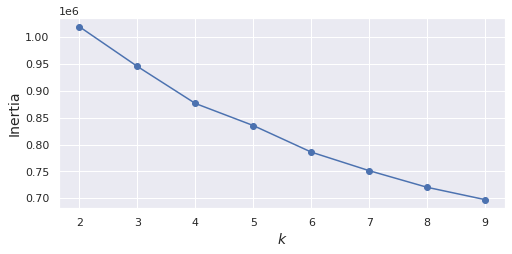

In [0]:
#k_range = range(2,15)
inertias = [model.inertia_ for model in kmeans_per_k]
#best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
#plt.plot(best_k, best_inertia, "rs")
plt.show()

In [0]:
def plot_centroids(centroids, weights=None, circle_color='black', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

{0, 1, 2, 3, 4, 5, 6, 7}


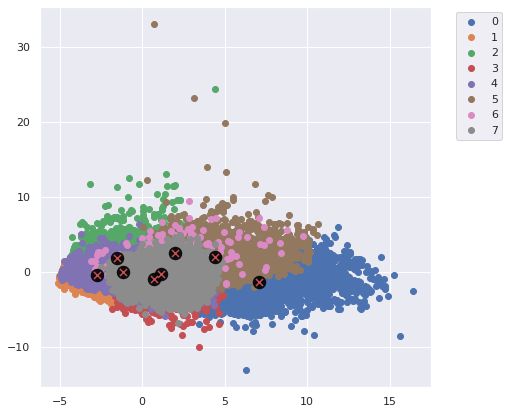

In [0]:
clusters_number=8
kmeans = KMeans(n_clusters=clusters_number, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state, \
                n_jobs=n_jobs)
kmeans.fit(X_train_PCA)
cluster=kmeans.predict(X_train_PCA)

unique_labels = set(cluster)
print(unique_labels)

fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number):
  plt.scatter(X_train_PCA.loc[cluster==k, 0],X_train_PCA.loc[cluster==k, 1], 
              #edgecolor='black',
              marker='o',label=k)
plot_centroids(kmeans.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

### Assign result to data frame

In [0]:
X_train_kmeansClustered = kmeans.predict(X_train_PCA)
data['cluster_kmean'] = kmeans.predict(X_train_PCA)
data['cluster_kmean'] .value_counts()

1    13298
3     8404
2     6510
7     5376
5     3765
0     2786
4     2233
6      170
Name: cluster_kmean, dtype: int64

In [0]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,installmentOverLoanAmnt,loanAmntOverIncome,revol_balOverIncome,totalPymntOverIncome,totalPymntInvOverIncome,totalRecPrncpOverIncome,totalRecIncOverIncome,cluster_kmean
0,5000.0,5000.0,4975.0,36.0,1065.0,162.87,B,B2,10.0,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,Jan-85,0.0,0.0,3.0,0.0,13648.0,8370.0,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,0.032574,0.208333,0.568667,0.244298,0.243077,0.208333,0.035965,3
1,2500.0,2500.0,2500.0,60.0,1527.0,59.83,C,C4,1.0,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,Apr-99,0.0,0.0,3.0,0.0,1687.0,940.0,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,0.023932,0.083333,0.056233,0.033818,0.033818,0.015215,0.014506,1
2,2400.0,2400.0,2400.0,36.0,1596.0,84.33,C,C5,10.0,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,Nov-01,0.0,0.0,2.0,0.0,2956.0,9850.0,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,0.035138,0.195886,0.241267,0.245321,0.245321,0.195886,0.049434,1
3,10000.0,10000.0,10000.0,36.0,1349.0,339.31,C,C1,10.0,RENT,49200.0,Source Verified,n,other,CA,20.00,0.0,Feb-96,35.0,0.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,0.033931,0.203252,0.113780,0.248616,0.248616,0.203252,0.045019,3
4,3000.0,3000.0,3000.0,60.0,1269.0,67.79,B,B5,1.0,RENT,80000.0,Source Verified,n,other,OR,17.94,0.0,Jan-96,38.0,0.0,15.0,0.0,27783.0,5390.0,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,0.022597,0.037500,0.347288,0.050836,0.050836,0.037500,0.013336,2


In [0]:
X_train_PCA_new=X_train_PCA.copy()
X_train_PCA_new['cluster_kmean'] = kmeans.predict(X_train_PCA)
X_train_PCA_new['cluster_kmean'] .value_counts()
X_train_PCA_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster_kmean
0,-1.380932,-1.474191,0.398311,2.831465,-0.056052,0.599083,-0.495896,1.032829,-0.358776,-0.338009,1.523137,-0.082681,-1.585536,-0.008231,1.243706,0.237386,0.059565,3
1,-3.792047,-1.494778,0.935322,-1.820591,1.265852,-2.015702,-0.928890,1.521414,0.406402,-0.051833,-0.808692,-0.072513,0.931813,-0.579395,-0.934316,0.769138,0.031590,1
2,-2.183863,-2.391327,0.633652,0.985710,0.113116,0.692513,-1.575598,0.567319,-0.492994,-0.465613,1.741415,0.039054,-1.223902,0.966469,-1.153819,-0.237713,0.323258,1
3,0.250494,0.022005,-0.281386,0.260463,-0.077475,0.261603,0.841456,-2.075136,0.085326,2.113879,1.207169,-0.425897,-0.772985,0.053153,0.274305,1.029250,0.306143,3
4,-2.764185,1.640453,1.563633,1.193983,0.345615,-2.654270,0.152870,-0.548818,-0.688245,0.266337,-1.348406,-0.119117,1.095683,0.203939,0.220764,-0.437535,-0.419559,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,-3.497306,0.353025,-0.676279,-0.672795,0.145243,-0.417337,0.457185,0.314268,-0.086152,0.213311,1.092213,0.628037,-1.178649,0.374053,-0.456604,-0.295642,-0.092202,1
42538,-0.172414,0.193199,-0.286570,0.038003,0.180263,-0.328226,-0.076451,0.406556,0.063783,-0.123448,-0.234394,0.251734,-0.365927,-0.044181,-0.187312,0.132373,-0.052357,3
42539,-0.172414,0.193199,-0.286570,0.038003,0.180263,-0.328226,-0.076451,0.406556,0.063783,-0.123448,-0.234394,0.251734,-0.365927,-0.044181,-0.187312,0.132373,-0.052357,3
42540,-0.172414,0.193199,-0.286570,0.038003,0.180263,-0.328226,-0.076451,0.406556,0.063783,-0.123448,-0.234394,0.251734,-0.365927,-0.044181,-0.187312,0.132373,-0.052357,3


In [0]:
X_train_PCA_new.cluster_kmean.unique()

array([3, 1, 2, 7, 0, 5, 4, 6], dtype=int32)

In [0]:
clusters_number_new=len(X_train_PCA_new.cluster_kmean.unique())

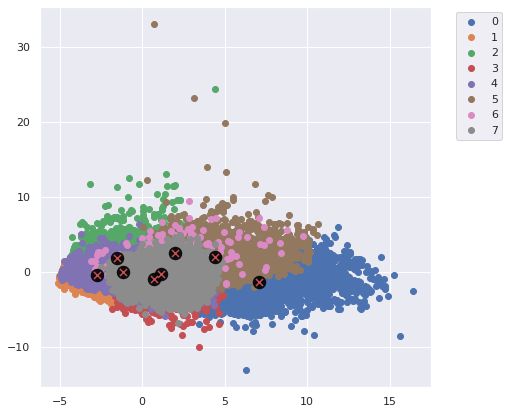

In [0]:
temp=X_train_PCA_new['cluster_kmean']
fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number_new):
  plt.scatter(X_train_PCA.loc[temp==k, 0],X_train_PCA.loc[temp==k, 1], 
              #edgecolor='black',
              marker='o',label=k)
plot_centroids(kmeans.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Accuracy

In [0]:
preds = pd.concat([y_train,pd.DataFrame(X_train_kmeansClustered)], axis=1)
preds.columns = ['trueLabel','cluster']
preds

,trueLabel,cluster
0,1,3
1,2,1
2,2,1
3,2,3
4,1,2
...,...,...
42537,0,1
42538,7,3
42539,7,3
42540,7,3


In [0]:
preds.groupby(['cluster','trueLabel']).size().unstack()

trueLabel,0,1,2,3,4,5,6,7
cluster,,,,,,,,
0,34.0,576.0,574.0,554.0,612.0,323.0,113.0,NaN
1,4555.0,3686.0,2647.0,1583.0,615.0,156.0,56.0,NaN
2,2275.0,1862.0,1213.0,688.0,285.0,113.0,74.0,NaN
3,2461.0,2745.0,1723.0,1000.0,331.0,103.0,34.0,7.0
4,150.0,650.0,629.0,442.0,232.0,94.0,36.0,NaN
5,394.0,1284.0,736.0,645.0,431.0,174.0,101.0,NaN
6,9.0,23.0,36.0,27.0,35.0,28.0,12.0,NaN
7,305.0,1563.0,1182.0,1077.0,853.0,310.0,86.0,NaN


In [0]:
countMostFreq =pd.DataFrame(data=preds.groupby('cluster').agg( \
                    lambda x:x.value_counts().iloc[0]))
countMostFreq.reset_index(inplace=True,drop=False)
countMostFreq.columns = ['cluster','countMostFrequent_by_True']
countMostFreq

,cluster,countMostFrequent_by_True
0,0,612
1,1,4555
2,2,2275
3,3,2745
4,4,650
5,5,1284
6,6,36
7,7,1563


In [0]:
countByCluster = pd.DataFrame(data=pd.DataFrame(X_train_kmeansClustered)[0].value_counts())
countByCluster.reset_index(inplace=True,drop=False)
countByCluster.columns = ['cluster','clusterCount']
countByCluster  

,cluster,clusterCount
0,1,13298
1,3,8404
2,2,6510
3,7,5376
4,5,3765
5,0,2786
6,4,2233
7,6,170


In [0]:
accuracyDF = countMostFreq.merge(countByCluster, \
                    left_on="cluster",right_on="cluster")
accuracyDF

,cluster,countMostFrequent_by_True,clusterCount
0,0,612,2786
1,1,4555,13298
2,2,2275,6510
3,3,2745,8404
4,4,650,2233
5,5,1284,3765
6,6,36,170
7,7,1563,5376


In [0]:
accuracyDF['accuracy']=accuracyDF['countMostFrequent_by_True']/accuracyDF['clusterCount']
accuracyDF

,cluster,countMostFrequent_by_True,clusterCount,accuracy
0,0,612,2786,0.219670
1,1,4555,13298,0.342533
2,2,2275,6510,0.349462
3,3,2745,8404,0.326630
4,4,650,2233,0.291088
5,5,1284,3765,0.341036
6,6,36,170,0.211765
7,7,1563,5376,0.290737


In [0]:
overallAccuracy = accuracyDF.countMostFrequent_by_True.sum()/ \
                    accuracyDF.clusterCount.sum()
overallAccuracy

0.32250481876733583

## Joint to One function

In [0]:
def cluster_accuracy(X_train_kmeansClustered,y_train):
  preds = pd.concat([y_train,pd.DataFrame(X_train_kmeansClustered)], axis=1)
  preds.columns = ['trueLabel','cluster']

  countMostFreq =pd.DataFrame(data=preds.groupby('cluster').agg( \
                      lambda x:x.value_counts().iloc[0]))
  countMostFreq.reset_index(inplace=True,drop=False)
  countMostFreq.columns = ['cluster','countMostFrequent_by_True']

  countByCluster = pd.DataFrame(data=pd.DataFrame(X_train_kmeansClustered)[0].value_counts())
  countByCluster.reset_index(inplace=True,drop=False)
  countByCluster.columns = ['cluster','clusterCount']
  accuracyDF = countMostFreq.merge(countByCluster, \
                      left_on="cluster",right_on="cluster")
  accuracyDF['accuracy']=accuracyDF['countMostFrequent_by_True']/accuracyDF['clusterCount']
  overallAccuracy = accuracyDF.countMostFrequent_by_True.sum()/ \
                      accuracyDF.clusterCount.sum()
  return accuracyDF,overallAccuracy

In [0]:
cluster_accuracy(X_train_kmeansClustered,y_train)

(   cluster  countMostFrequent_by_True  clusterCount  accuracy
 0        0                        612          2786  0.219670
 1        1                       4555         13298  0.342533
 2        2                       2275          6510  0.349462
 3        3                       2745          8404  0.326630
 4        4                        650          2233  0.291088
 5        5                       1284          3765  0.341036
 6        6                         36           170  0.211765
 7        7                       1563          5376  0.290737,
 0.32250481876733583)

Study accuracy with cluster in range (2,31)

In [0]:
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2
overallAccuracy_kMeansDF=[]
for n_clusters in range(2,31):
  print(n_clusters)
  kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                  max_iter=max_iter, tol=tol, random_state=random_state, \
                  n_jobs=n_jobs)
  kmeans.fit(X_train_PCA)
  X_train_kmeansClustered=kmeans.predict(X_train_PCA)
  accuracyDF,overallAccuracy=cluster_accuracy(X_train_kmeansClustered,y_train)
  overallAccuracy_kMeansDF.append(overallAccuracy)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


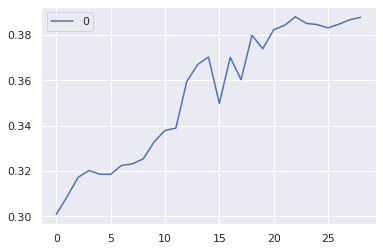

In [0]:
pd.DataFrame(overallAccuracy_kMeansDF).plot()

In [0]:
X_train_kmeansClustered.shape # cluster have index like X_train_PCA

(42542,)

In [0]:
X_train_kmeansClustered

array([3, 1, 1, ..., 3, 3, 3], dtype=int32)

{0, 1, 2, 3, 4, 5, 6, 7}


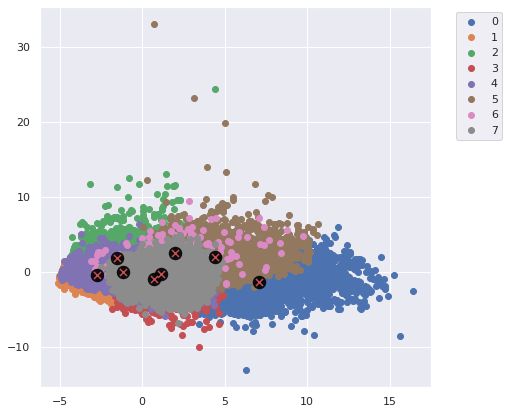

In [0]:
unique_labels = set(X_train_kmeansClustered)
print(unique_labels)
clusters_number=len(unique_labels)
fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number):
  plt.scatter(X_train_PCA.loc[X_train_kmeansClustered==k, 0],X_train_PCA.loc[X_train_kmeansClustered==k, 1], 
              #edgecolor='black',
              marker='o',label=k)
plot_centroids(kmeans.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [0]:
X_train_kmeansClustered = kmeans.predict(X_train_PCA)
accuracyDF,overallAccuracy=cluster_accuracy(X_train_kmeansClustered,y_train)
print(accuracyDF)
print('overallAccuracy',overallAccuracy)

    cluster  countMostFrequent_by_True  clusterCount  accuracy
0         0                       2077          2791  0.744178
1         1                       1017          2742  0.370897
2         2                        266          1033  0.257502
3         3                        183           683  0.267936
4         4                       1421          3045  0.466667
5         5                        627          1614  0.388476
6         6                        527          1607  0.327940
7         7                        920          2521  0.364935
8         8                          9            41  0.219512
9         9                        664          1634  0.406365
10       10                       2021          2818  0.717175
11       11                        203           704  0.288352
12       12                        100           371  0.269542
13       13                        726          2112  0.343750
14       14                        975          3068  0

In [0]:
X_train_kmeansClustered

array([3, 1, 1, ..., 3, 3, 3], dtype=int32)

# Hierarchical clustering

In [0]:
Z = fastcluster.linkage_vector(X_train_PCA, \
                               method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, \
    columns=['clusterOne','clusterTwo','distance','newClusterSize'])
Z_dataFrame

,clusterOne,clusterTwo,distance,newClusterSize
0,39786.0,39787.0,0.000000e+00,2.0
1,39788.0,42542.0,0.000000e+00,3.0
2,42540.0,42541.0,0.000000e+00,2.0
3,42538.0,42539.0,5.551115e-17,2.0
4,42544.0,42545.0,1.275700e-16,4.0
...,...,...,...,...
42536,85066.0,85075.0,3.089493e+02,8112.0
42537,85077.0,85078.0,3.369406e+02,17185.0
42538,85065.0,85076.0,4.035803e+02,22245.0
42539,85070.0,85079.0,4.206925e+02,20297.0


In [0]:
Z_dataFrame.describe()

,clusterOne,clusterTwo,distance,newClusterSize
count,42541.000000,42541.000000,42541.000000,42541.000000
mean,35728.538774,49352.461226,3.143302,17.551256
std,25673.847212,21320.535595,7.189956,331.922252
min,0.000000,270.000000,0.000000,2.000000
25%,12433.000000,32590.000000,1.315499,2.000000
50%,31110.000000,50003.000000,1.976358,3.000000
75%,58131.000000,67529.000000,3.204064,6.000000
max,85080.000000,85081.000000,609.364146,42542.000000


In [0]:
distance_threshold = 160
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = clusters
X_train_hierClustered

array([ 6, 15,  6, ...,  6,  6,  6], dtype=int32)

In [0]:
print("Number of distinct clusters: ", \
      len(set(X_train_hierClustered)))

Number of distinct clusters:  15


In [0]:
accuracyDF,overallAccuracy=cluster_accuracy(X_train_hierClustered,y_train)
print(accuracyDF)
print('overallAccuracy',overallAccuracy)

    cluster  countMostFrequent_by_True  clusterCount  accuracy
0         1                        654          2347  0.278654
1         2                         31           115  0.269565
2         3                        963          2581  0.373111
3         4                        570          1938  0.294118
4         5                       4499          6151  0.731426
5         6                       3076          9113  0.337540
6         7                        278           992  0.280242
7         8                        482          2120  0.227358
8         9                       2281          6301  0.362006
9        10                         79           348  0.227011
10       11                        877          2332  0.376072
11       12                         28            92  0.304348
12       13                         48           227  0.211454
13       14                       1001          3342  0.299521
14       15                       1214          4543  0

The overall accuracy is approximately 37%, a bit worse than with k-means
clustering. That being said, hierarchical clustering works differently than
k-means and may group some borrowers more accurately than k-means,
while k-means may group other borrowers more accurately than
hierarchical clustering.
In other words, the two clustering algorithms may complement each other,
and this is worth exploring by ensembling the two and assessing the
ensemble’s results compared to the results of either standalone solution.2

In [0]:
X_train_hierClustered

array([ 6, 15,  6, ...,  6,  6,  6], dtype=int32)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}


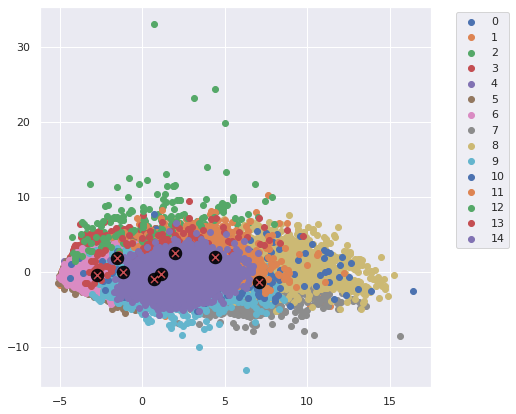

In [0]:
unique_labels = set(X_train_hierClustered)
print(unique_labels)
clusters_number=len(unique_labels)
fig,ax=plt.subplots(figsize=(7,7))
for k in range(clusters_number):
  plt.scatter(X_train_PCA.loc[X_train_hierClustered==k, 0],X_train_PCA.loc[X_train_hierClustered==k, 1], 
              #edgecolor='black',
              marker='o',label=k)
plot_centroids(kmeans.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# DBSCAN

## Find optimal esp

In [0]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train_PCA)
distances, indices = nbrs.kneighbors(X_train_PCA)
distances = np.sort(distances, axis=0)

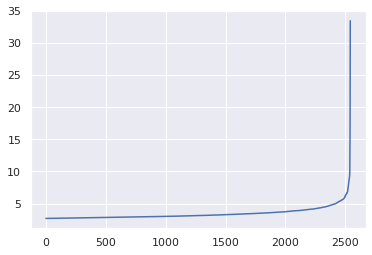

In [0]:
distances_new = distances[40000:,1]
plt.plot(distances_new)

In [0]:
eps = 3
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, 
            n_jobs=n_jobs)


X_train_PCA_dbscanClustered = db.fit_predict(X_train_PCA)

print("Number of distinct clusters: ", \
      len(set(X_train_PCA_dbscanClustered)))

accuracyDF,overallAccuracy=cluster_accuracy(X_train_PCA_dbscanClustered,y_train)
print(accuracyDF)
print('overallAccuracy',overallAccuracy)

Number of distinct clusters:  10
   cluster  countMostFrequent_by_True  clusterCount  accuracy
0       -1                        439          2024  0.216897
1        0                      11439         38449  0.297511
2        1                        624          2043  0.305433
3        2                          2             3  0.666667
4        3                          3             5  0.600000
5        4                          2             2  1.000000
6        5                          2             5  0.400000
7        6                          3             5  0.600000
8        7                          1             2  0.500000
9        8                          3             4  0.750000
overallAccuracy 0.2942503878520051


# HDBSCAN

## DNN

In [0]:
!pip install hdbscan
import hdbscan

     |████████████████████████████████| 4.7MB 3.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2308875 sha256=7a563a3885aa8f5b31d93c91e2c418cee3d2bfa92108609f863297d29c1970ba
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [0]:
min_cluster_size = 30
min_samples = None
alpha = 1.0
cluster_selection_method = 'eom'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
        min_samples=min_samples, alpha=alpha, \
        cluster_selection_method=cluster_selection_method)

X_train_PCA_hdbscanClustered = hdb.fit_predict(X_train_PCA)

In [0]:
print("Number of distinct clusters: ", \
      len(set(X_train_PCA_hdbscanClustered)))

accuracyDF,overallAccuracy=cluster_accuracy(X_train_PCA_hdbscanClustered,y_train)
print(accuracyDF)
print('overallAccuracy',overallAccuracy)

Number of distinct clusters:  3
   cluster  countMostFrequent_by_True  clusterCount  accuracy
0       -1                        768          3686  0.208356
1        0                        589          1787  0.329603
2        1                      11168         37069  0.301276
overallAccuracy 0.2944149311268864


{0, 1, -1}


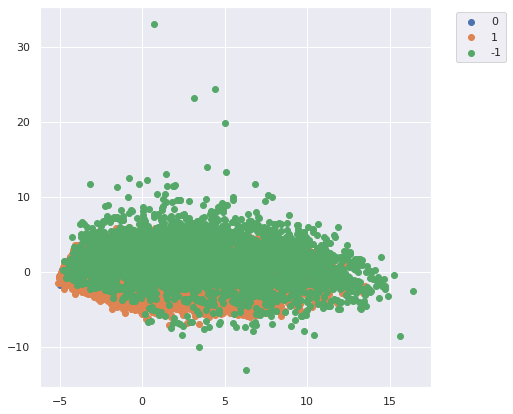

In [0]:
unique_labels = set(X_train_PCA_hdbscanClustered)
print(unique_labels)
clusters_number=len(unique_labels)
fig,ax=plt.subplots(figsize=(7,7))
for k in unique_labels:
  plt.scatter(X_train_PCA.loc[X_train_PCA_hdbscanClustered==k, 0],X_train_PCA.loc[X_train_PCA_hdbscanClustered==k, 1], 
              #edgecolor='black',
              marker='o',label=k)
#plot_centroids(kmeans.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Book reference

In [0]:
min_cluster_size = 20
min_samples = 20
alpha = 1.0
cluster_selection_method = 'leaf'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
        min_samples=min_samples, alpha=alpha, \
        cluster_selection_method=cluster_selection_method)

X_train_PCA_hdbscanClustered = hdb.fit_predict(X_train_PCA)

In [0]:
print("Number of distinct clusters: ", \
      len(set(X_train_PCA_hdbscanClustered)))

accuracyDF,overallAccuracy=cluster_accuracy(X_train_PCA_hdbscanClustered,y_train)
print(accuracyDF)
print('overallAccuracy',overallAccuracy)

Number of distinct clusters:  10
   cluster  countMostFrequent_by_True  clusterCount  accuracy
0       -1                      10903         38418  0.283799
1        0                         13            31  0.419355
2        1                        389           906  0.429360
3        2                         25            50  0.500000
4        3                        513          1283  0.399844
5        4                         16            45  0.355556
6        5                        344           811  0.424168
7        6                         64           143  0.447552
8        7                        606           784  0.772959
9        8                         71            71  1.000000
overallAccuracy 0.3042640214376381


{0, 1, 2, 3, 4, 5, 6, 7, 8, -1}


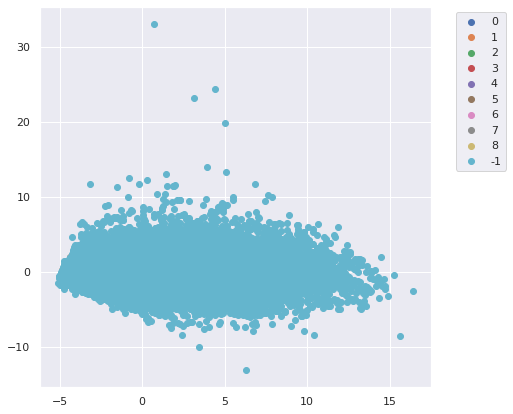

In [0]:
unique_labels = set(X_train_PCA_hdbscanClustered)
print(unique_labels)
clusters_number=len(unique_labels)
fig,ax=plt.subplots(figsize=(7,7))
for k in unique_labels:
  plt.scatter(X_train_PCA.loc[X_train_PCA_hdbscanClustered==k, 0],X_train_PCA.loc[X_train_PCA_hdbscanClustered==k, 1], 
              #edgecolor='black',
              marker='o',label=k)
#plot_centroids(kmeans.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# GMM

In [0]:
# Function to plot cluster (GMM)
def plot_centroids_2(centroids, weights=None, circle_color='black', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_cluster_gmm(model,X):
  y_pred = model.predict(X)

  clusters_number=len(set(y_pred))
  print('Number cluster: ',clusters_number)

  unique_labels = set(y_pred)
  print(unique_labels)

  colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                            '#f781bf', '#a65628', '#984ea3',
                                            '#999999', '#e41a1c', '#dede00']),
                                    int(max(y_pred) + 1))))
  # add black color for outliers (if any)
  colors = np.append(colors, ["#000000"])
  #print(colors)
  i=0

  fig,ax=plt.subplots(figsize=(7,5))

  for k in unique_labels:
    plt.scatter(X[y_pred==k, 0],X[y_pred==k, 1], 
                #edgecolor='black',
                marker='o',label=k,
                c=colors[i] # Note: depend on number of cluster (max 8), if infinitive cluster, need to remove colors
                )
    i+=1
  plot_centroids_2(model.means_,model.weights_)
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
  plt.show()

In [0]:
# Function plot_gaussian_mixture
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)
    
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [0]:
gms_per_k =[]
for k in range(2, 9):
  print(k)
  t1=time.time()
  temp=GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X_train_PCA)
  gms_per_k.append(temp)
  t2=time.time()
  print(t2-t1)

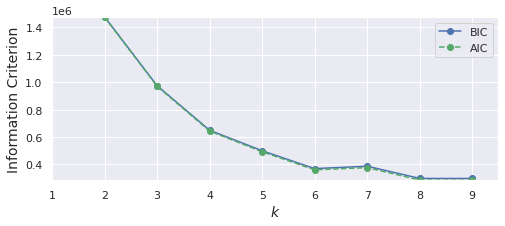

In [0]:
bics = [model.bic(X_train_PCA) for model in gms_per_k]
aics = [model.aic(X_train_PCA) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.legend()
#save_fig("aic_bic_vs_k_plot")
plt.show()

In [0]:
k=8
t1=time.time()
gmm=GaussianMixtX_train_PCAure(n_components=k, n_init=10, random_state=42).fit(X_train_PCA)
t2=time.time()
print(t1-t2)

In [0]:
X_train_PCA_GMMClustered = gmm.predict(X_train_PCA)
unique_labels = set(X_train_PCA_GMMClustered)
print(unique_labels)

{0, 1, 2, 3, 4, 5, 6, 7}


In [0]:
print("Number of distinct clusters: ", \
      len(set(X_train_PCA_GMMClustered)))

accuracyDF,overallAccuracy=cluster_accuracy(X_train_PCA_GMMClustered,y_train)
print(accuracyDF)
print('overallAccuracy',overallAccuracy)

Number of distinct clusters:  8
   cluster  countMostFrequent_by_True  clusterCount  accuracy
0        0                        266          1249  0.212970
1        1                       1700          5626  0.302169
2        2                        530          1944  0.272634
3        3                       7651         19056  0.401501
4        4                       1818          6115  0.297302
5        5                        580          1890  0.306878
6        6                       1275          4890  0.260736
7        7                        368          1772  0.207675
overallAccuracy 0.3335057120022566


Accuracy is beeter than HDBSCAN and Hierarchical with only 8 cluster

{0, 1, 2, 3, 4, 5, 6, 7}


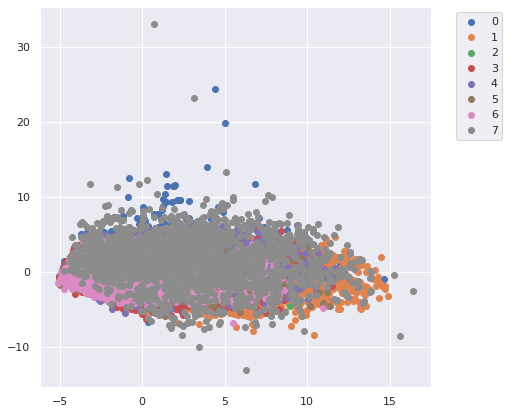

In [0]:
unique_labels = set(X_train_PCA_GMMClustered)
print(unique_labels)
clusters_number=len(unique_labels)
fig,ax=plt.subplots(figsize=(7,7))
for k in unique_labels:
  plt.scatter(X_train_PCA.loc[X_train_PCA_GMMClustered==k, 0],X_train_PCA.loc[X_train_PCA_GMMClustered==k, 1], 
              #edgecolor='black',
              marker='o',label=k)
#plot_centroids(kmeans.cluster_centers_) # Plot center
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Abnormal detection by GMM

Gaussian Mixtures can be used for anomaly detection: instances located in low-density regions can be considered anomalies. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well-known. Say it is equal to 4%, then you can set the density threshold to be the value that results in having 4% of the instances located in areas below that threshold density:

In [0]:
threshold=3

densities = gmm.score_samples(X_train_PCA)
density_threshold = np.percentile(densities, threshold)
anomalies = X_train_PCA[densities < density_threshold]
print(densities.shape)
print(anomalies.shape)

(42542,)
(1277, 17)


In [0]:
print(density_threshold)
pd.DataFrame(densities).describe()

-30.989557040974958


,0
count,42542.000000
mean,-3.325249
std,12.506791
min,-410.466105
25%,-11.589119
50%,-0.276822
75%,7.539959
max,13.239319


In [0]:
data['cluster_gmm'] = gmm.predict(X_train_PCA)
data['cluster_gmm'] .value_counts()

3    19056
4     6115
1     5626
6     4890
2     1944
5     1890
7     1772
0     1249
Name: cluster_gmm, dtype: int64

In [0]:
data['score_gmm']=densities
#data['cluster_gmm'][data['score_gmm']<density_threshold]=-1
data.loc[data['score_gmm'] <density_threshold, 'cluster_gmm'] = -1
data['cluster_gmm'].value_counts()

 3    19055
 4     6089
 1     5626
 6     4855
 2     1892
 5     1847
 7     1648
-1     1277
 0      253
Name: cluster_gmm, dtype: int64

In [0]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,installmentOverLoanAmnt,loanAmntOverIncome,revol_balOverIncome,totalPymntOverIncome,totalPymntInvOverIncome,totalRecPrncpOverIncome,totalRecIncOverIncome,cluster_kmean,cluster_gmm,score_gmm
0,5000.000000,5000.000000,4975.000000,36.000000,1065.000000,162.870000,B,B2,10.000000,RENT,24000.00000,Verified,n,credit_card,AZ,27.650000,0.0,Jan-85,0.0,0.0,3.000000,0.0,13648.000000,8370.000000,9.000000,f,0.0,0.0,5863.155187,5833.840000,5000.000000,863.160000,0.00,0.0,0.00,Jan-15,171.620000,0.032574,0.208333,0.568667,0.244298,0.243077,0.208333,0.035965,3,3,2.696803
1,2500.000000,2500.000000,2500.000000,60.000000,1527.000000,59.830000,C,C4,1.000000,RENT,30000.00000,Source Verified,n,car,GA,1.000000,0.0,Apr-99,0.0,0.0,3.000000,0.0,1687.000000,940.000000,4.000000,f,0.0,0.0,1014.530000,1014.530000,456.460000,435.170000,0.00,122.9,1.11,Apr-13,119.660000,0.023932,0.083333,0.056233,0.033818,0.033818,0.015215,0.014506,1,6,-10.024985
2,2400.000000,2400.000000,2400.000000,36.000000,1596.000000,84.330000,C,C5,10.000000,RENT,12252.00000,Not Verified,n,small_business,IL,8.720000,0.0,Nov-01,0.0,0.0,2.000000,0.0,2956.000000,9850.000000,10.000000,f,0.0,0.0,3005.666844,3005.670000,2400.000000,605.670000,0.00,0.0,0.00,Jun-14,649.910000,0.035138,0.195886,0.241267,0.245321,0.245321,0.195886,0.049434,1,3,3.902881
3,10000.000000,10000.000000,10000.000000,36.000000,1349.000000,339.310000,C,C1,10.000000,RENT,49200.00000,Source Verified,n,other,CA,20.000000,0.0,Feb-96,35.0,0.0,10.000000,0.0,5598.000000,21.000000,37.000000,f,0.0,0.0,12231.890000,12231.890000,10000.000000,2214.920000,16.97,0.0,0.00,Jan-15,357.480000,0.033931,0.203252,0.113780,0.248616,0.248616,0.203252,0.045019,3,2,-16.371930
4,3000.000000,3000.000000,3000.000000,60.000000,1269.000000,67.790000,B,B5,1.000000,RENT,80000.00000,Source Verified,n,other,OR,17.940000,0.0,Jan-96,38.0,0.0,15.000000,0.0,27783.000000,5390.000000,38.000000,f,0.0,0.0,4066.908161,4066.910000,3000.000000,1066.910000,0.00,0.0,0.00,Jan-17,67.300000,0.022597,0.037500,0.347288,0.050836,0.050836,0.037500,0.013336,2,1,3.928316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42537,5000.000000,5000.000000,0.000000,36.000000,775.000000,156.110000,A,A3,10.000000,MORTGAGE,70000.00000,Not Verified,n,other,CT,8.810000,0.0,NaN,0.0,0.0,9.343951,0.0,0.000000,4425.835363,22.124406,f,0.0,0.0,5619.762090,0.000000,5000.000000,619.760000,0.00,0.0,0.00,Jun-10,156.390000,0.031222,0.071429,0.000000,0.080282,0.000000,0.071429,0.008854,1,6,-7.443856
42538,11089.722581,10821.585753,10139.938785,42.207218,1216.501563,322.623063,NaN,NaN,5.045289,NaN,69136.55642,NaN,NaN,NaN,NaN,13.373043,0.0,NaN,0.0,0.0,9.343951,0.0,14297.860915,4425.835363,22.124406,NaN,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,NaN,2613.245652,0.029092,0.160403,0.206806,0.173860,0.163627,0.139950,0.032399,3,4,-4.642193
42539,11089.722581,10821.585753,10139.938785,42.207218,1216.501563,322.623063,NaN,NaN,5.045289,NaN,69136.55642,NaN,NaN,NaN,NaN,13.373043,0.0,NaN,0.0,0.0,9.343951,0.0,14297.860915,4425.835363,22.124406,NaN,0.0,0.0,12020.073691,11312.613676,9675.675936,2239.981444,0.00,0.0,0.00,NaN,2613.245652,0.029092,0.160403,0.206806,0.173860,0.163627,0.139950,0.032399,3,4,-4.642193
42540,11089.722581,10821.585753,10139.938785,42.207218,1216.501563,322.623063,NaN,NaN,5.045289,NaN,69136.55642,NaN,NaN,NaN,NaN,13.373043,0.0,NaN,0.0,0.0,9.343951,0.0,1429

# Compare all method

In [0]:
import time
import warnings
from sklearn import cluster, mixture

X=X_train_PCA.copy()
time_=[]
name_=[]
num_cluster=[]
# Default setting for clustering algorithm:
default_base = {'quantile': .3,     # Meanshift bandwith
                'eps': .3,          # Dbscan
                'damping': .9,      # Affinity_propagation 
                'preference': -200, # Affinity_propagation 
                'n_neighbors': 10,  # Agglomerative, average_linkage 
                'n_clusters': 10, # Two_means, Agglomerative, Spectral, Average_linkage, Birch, GaussianMixture
                'min_samples': 20,  # Optics
                'xi': 0.05,         # Optics 
                'min_cluster_size': 0.1 # Optics
                }

# update parameters with dataset-specific values
params = default_base.copy()

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile']) # Mean shift

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
    X, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)

two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])

ward = cluster.AgglomerativeClustering(
    n_clusters=params['n_clusters'], linkage='ward',
    connectivity=connectivity)

average_linkage = cluster.AgglomerativeClustering(
    linkage="average", affinity="cityblock",
    n_clusters=params['n_clusters'], connectivity=connectivity)

spectral = cluster.SpectralClustering(
    n_clusters=params['n_clusters'], eigen_solver='arpack',
    affinity="nearest_neighbors")

dbscan = cluster.DBSCAN(eps=params['eps'])

optics = cluster.OPTICS(min_samples=params['min_samples'],
                        xi=params['xi'],
                        min_cluster_size=params['min_cluster_size'])

affinity_propagation = cluster.AffinityPropagation(
    damping=params['damping'], preference=params['preference'])

birch = cluster.Birch(n_clusters=params['n_clusters'])

gmm = mixture.GaussianMixture(
    n_components=params['n_clusters'], covariance_type='full')

clustering_algorithms = (
    ('MiniBatchKMeans (D)', two_means),
    ('AffinityPropagation', affinity_propagation),
    ('MeanShift', ms),
    ('SpectralClustering (D)', spectral),
    ('Agglomerative-ward (D)', ward),
    ('Agglomerative-average_linkage (D)', average_linkage),
    ('DBSCAN', dbscan),
    ('OPTICS', optics),
    ('Birch (D)', birch),
    ('GaussianMixture (D)', gmm)
)

for name, algorithm in clustering_algorithms:
    t0 = time.time()
    print(name)
    name_.append(name)
    # catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(X)

    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(X)

    
    #---------------DNN add-----------------------

    clusters_number=len(set(y_pred))
    print('Number cluster: ',clusters_number)
    print(set(y_pred))
    num_cluster.append(clusters_number)

    unique_labels = set(y_pred)
  
    #print(unique_labels)
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                          '#f781bf', '#a65628', '#984ea3',
                                          '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])
    i=0
    fig,ax=plt.subplots(figsize=(7,5))

    for k in unique_labels:
      plt.scatter(X_scaled[y_pred==k, 0],X_scaled[y_pred==k, 1], 
                  edgecolor='black',marker='o',label=k,
                  #c=colors[i] # Note: depend on number of cluster, if infinitive cluster, need to remove colors
                  )
      i+=1
      
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

    plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
              transform=plt.gca().transAxes, size=15,
              horizontalalignment='right')
    #plot_num += 1
    #plt.legend(color)
    time_.append(t1-t0)
    plt.show()



In [0]:
pd.DataFrame(zip(name_,num_cluster,time_),columns=['Algorithm cluster','Num_cluster','Time']).sort_values(by='Time',ascending='False')